### 구단 순위변동 확인을 위한 Bump chart

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from bumpplot import bumpchart
from data_gen import generate_random_rank_data

In [3]:
# KBO 정규리그 순위(2002 ~ 2020)
data = pd.read_excel("../win.xlsx")
data.head()

,연도,순위_total,구단
0,2002,1,삼성
1,2002,2,LG
2,2002,3,KIA
3,2002,4,현대
4,2002,5,두산


In [4]:
# 모기업 변경에 따른 구단명 변화를 통일해 줌
data.loc[data['구단'] == '현대', '구단'] = '히어로즈'
data.loc[data['구단'] == '우리', '구단'] = '히어로즈'
data.loc[data['구단'] == '넥센', '구단'] = '히어로즈'
data.loc[data['구단'] == '키움', '구단'] = '히어로즈'

In [20]:
# Bump chart 작성을 위한 pivot table 만들기

df=data.pivot('연도','구단','순위_total')
df

구단,KIA,KT,LG,NC,SK,두산,롯데,삼성,한화,히어로즈
연도,,,,,,,,,,
2002,3.0,NaN,2.0,NaN,6.0,5.0,8.0,1.0,7.0,4.0
2003,3.0,NaN,6.0,NaN,2.0,7.0,8.0,4.0,5.0,1.0
2004,4.0,NaN,6.0,NaN,5.0,3.0,8.0,2.0,7.0,1.0
2005,8.0,NaN,6.0,NaN,3.0,2.0,5.0,1.0,4.0,7.0
2006,4.0,NaN,8.0,NaN,6.0,5.0,7.0,1.0,2.0,3.0
2007,8.0,NaN,5.0,NaN,1.0,2.0,7.0,4.0,3.0,6.0
2008,6.0,NaN,8.0,NaN,1.0,2.0,3.0,4.0,5.0,7.0
2009,1.0,NaN,7.0,NaN,2.0,3.0,4.0,5.0,8.0,6.0
2010,5.0,NaN,6.0,NaN,1.0,3.0,4.0,2.0,8.0,7.0


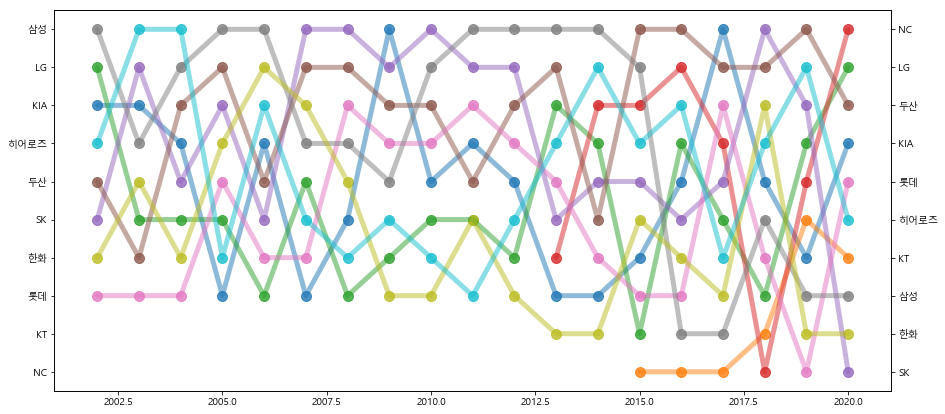

In [23]:
# 유형 1
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.figure(figsize=(15, 7))
bumpchart(df, show_rank_axis= False, scatter= True, holes= False,
          line_args= {"linewidth": 5, "alpha": 0.5}, scatter_args= {"s": 100, "alpha": 0.8})
plt.show()

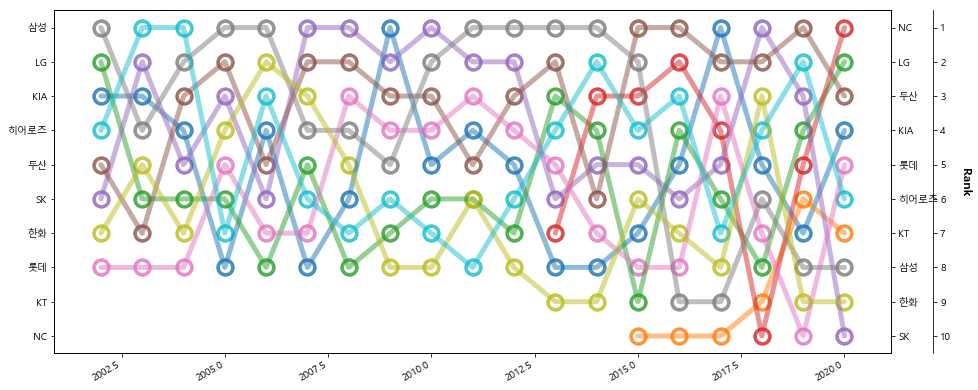

In [25]:
# 유형 2
plt.figure(figsize=(15, 7))

[laxis, raxis, fraxis] = bumpchart(
                           df, show_rank_axis= True, 
                           rank_axis_distance= 1.05,
                           ax= None, 
                           scatter= True, 
                           holes= True,
                           line_args= {"linewidth": 5, "alpha": 0.5},
                           scatter_args= {"s": 300, "alpha": 0.8},
                           hole_args= {"s": 100, "alpha": 1})



laxis.set_axisbelow(True)

fraxis.set_ylabel("Rank", rotation= -90, labelpad= 20, fontsize= 12, weight= "semibold")\

plt.gcf().autofmt_xdate()

plt.show()

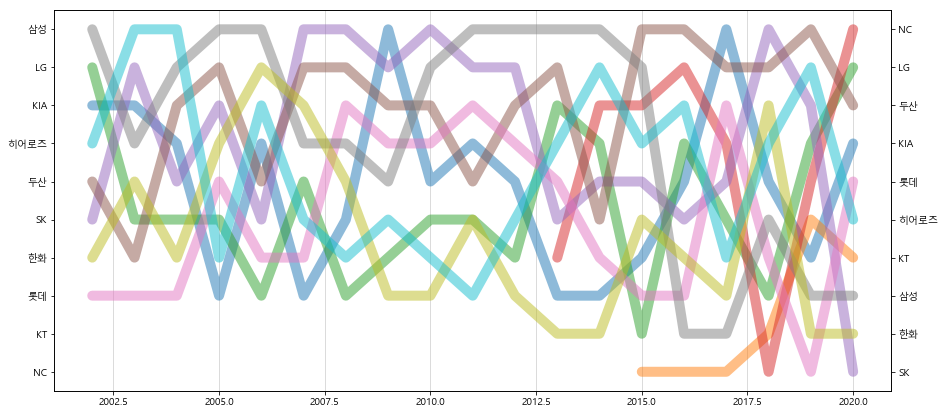

In [27]:
# 유형 3
plt.figure(figsize=(15, 7))

[laxis, raxis] = bumpchart(df, show_rank_axis= False,
                           ax= None, 
                           scatter= False,
                           line_args= {"linewidth": 10, "alpha": 0.5})

laxis.xaxis.grid(color='lightgray', linestyle='solid')
plt.show()